In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
#Reading the input file and splitting it into train and test
df_train = pd.read_csv('/Users/karunparashar/Downloads/mtx/Train_rsmpl.csv')
df = df_train.copy(deep=True)
X_resampled = df.iloc[:,0:52]
y_resampled = df.iloc[:,52]
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,test_size=0.2,
                                                    random_state = 7)

Here we build Naive bayes classifier using Gaussian and Bernoulli Distribution

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time
gnb = GaussianNB()
nbc = gnb.fit(x_train, y_train)
y_pred = nbc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.598


In [8]:
from sklearn.naive_bayes import BernoulliNB
bnb =BernoulliNB()
bnbc = bnb.fit(x_train, y_train)
y_pred = bnbc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.5925238095238096


It can be seen that both the models perform equally when accuracy is concerned

Testing our model on the resampled test data

In [13]:
df_test = pd.read_csv('/Users/karunparashar/Downloads/mtx/Tst_rsmpl.csv')
x_tet =df_test.iloc[:,0:52]
y_tet = df_test.iloc[:,52]

#Gaussian Naive Bayes
y_gaus_test = nbc.predict(x_tet)
print("Gaussian Naive Bayes Accuracy-",accuracy_score(y_gaus_test,y_tet))

#Bernoulli Naive Bayes
y_bern_test = bnbc.predict(x_tet)
print("Bernoulli Naive Bayes Accuracy-",accuracy_score(y_bern_test,y_tet))



Gaussian Naive Bayes Accuracy- 0.5861783669665444
Bernoulli Naive Bayes Accuracy- 0.558228883352036


Now let's see how the precision and recall score of the classes compare for both models

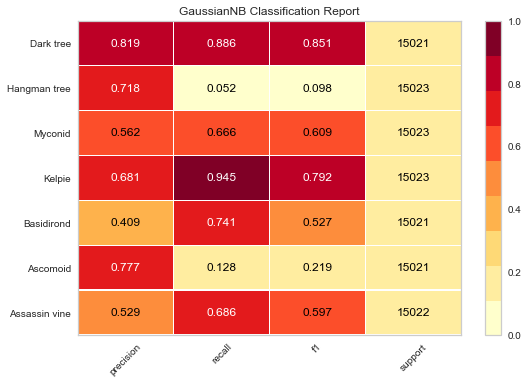

In [11]:
visualizer = ClassificationReport(gnb, classes=['Assassin vine',
 'Ascomoid',
 'Basidirond',
 'Kelpie',
 'Myconid',
 'Hangman tree',
 'Dark tree'], support=True)

visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_tet, y_tet)  # Evaluate the model on the test data
visualizer.poof()

The recall and F1 scores are way off for this classifier-hence it captures the data distribution in a fairly poor manner

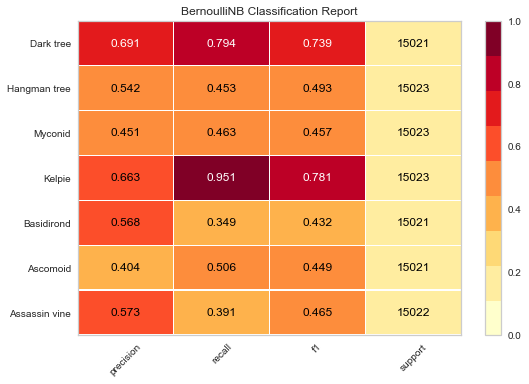

In [12]:
visualizer = ClassificationReport(bnb, classes=['Assassin vine',
 'Ascomoid',
 'Basidirond',
 'Kelpie',
 'Myconid',
 'Hangman tree',
 'Dark tree'], support=True)

visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
visualizer.score(x_tet, y_tet)  # Evaluate the model on the test data
visualizer.poof()

The scores are relatively better to Gaussian, hence it can be concluded that this model captures the distribution to some extent.

But on the grounds of how many accurate results it can predict, it is not at par with other models

### CONCLUSION

Out of these 2 models, the Bernoulli Naive Bayes seems to be the better fit